In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.graphics.tsaplots as tsaplots

In [2]:
walmart = pd.read_csv('H:\\\Time Series\\Walmart Footfalls Raw.csv')

In [3]:
walmart.shape

(159, 2)

In [4]:
walmart.isna().any().sum()

0

In [6]:
walmart

,Month,Footfalls
0,Jan-91,1709
1,Feb-91,1621
2,Mar-91,1973
3,Apr-91,1812
4,May-91,1975
...,...,...
154,Nov-03,2076
155,Dec-03,2141
156,Jan-04,1832
157,Feb-04,1838


In [7]:
Train = walmart.head(147)
Test  =walmart.tail(12)

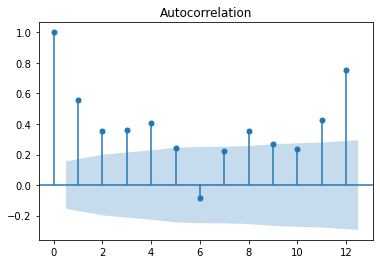

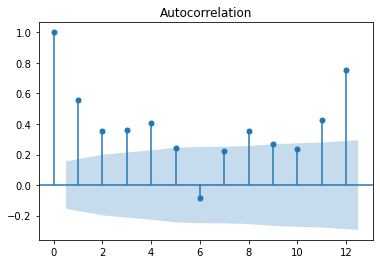

In [8]:
tsaplots.plot_acf(walmart.Footfalls,lags=12)

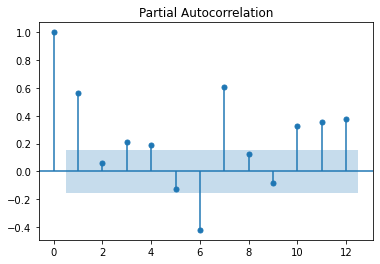

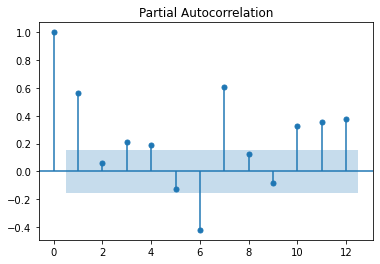

In [9]:
tsaplots.plot_pacf(walmart.Footfalls, lags=12)

In [10]:
#model with AR=4, MA=4
model1 = ARIMA(Train.Footfalls,order=(12,1,6)) #order p,d,q

In [12]:
import warnings
warnings.filterwarnings('ignore')
res1 = model1.fit()

In [15]:
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                ARIMA(12, 1, 6)   Log Likelihood                -825.776
Date:                Fri, 26 Nov 2021   AIC                           1689.552
Time:                        11:11:48   BIC                           1746.241
Sample:                             0   HQIC                          1712.586
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1250      0.145     -0.863      0.388      -0.409       0.159
ar.L2          0.0610      0.138      0.442      0.658      -0.210       0.332
ar.L3         -0.3102      0.141     -2.199      0.0

In [16]:
#forcast for next 12 months
start_index = len(Train)
end_index = start_index + 11

In [17]:
forcast_test = res1.predict(start=start_index, end=end_index)

In [19]:
forcast_test

147    2013.663616
148    2061.928450
149    1974.093030
150    2061.724443
151    2042.819997
152    1761.489211
153    1903.291262
154    1879.511816
155    1984.420022
156    1795.857316
157    1786.853140
158    2066.415448
Name: predicted_mean, dtype: float64


In [21]:
rmse_test = np.sqrt(mean_squared_error(Test.Footfalls,forcast_test))

In [23]:
print('Test RMSE: %.3f' % rmse_test)

Test RMSE: 136.669


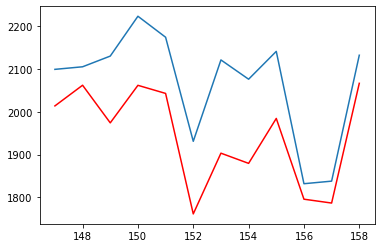

In [26]:
# plot forecasts against actual outcomes
plt.plot(Test.Footfalls)
plt.plot(forcast_test, color='red')
plt.show()

In [40]:
start_index = len(walmart)
end_index = start_index + 11
forecast = res1.predict(start=start_index, end=end_index)

print(forecast)

159    2002.836104
160    2057.926975
161    1956.081557
162    2062.028584
163    2041.082511
164    1776.578009
165    1902.398463
166    1878.728690
167    1977.583328
168    1811.439777
169    1808.044059
170    2065.425115
Name: predicted_mean, dtype: float64


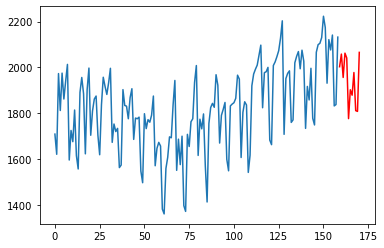

In [42]:
plt.plot(walmart.Footfalls)
plt.plot(forecast, color='red')
plt.show()